<a href="https://colab.research.google.com/github/shodimaggio/VieWork/blob/master/vie_sec5_linfilt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形フィルタ


## 画像ファイルの準備
以下では、画像ファイルを手元からアップロードする方法とURLを指定してアクセスする方法のいずれかを利用してください。
### アップロードする方法

In [0]:
#from google.colab import files
#uploaded_file = files.upload()

In [0]:
#file_name = next(iter(uploaded_file))
#print(file_name)

### URLを指定してアクセスする方法
- 参照サイト：　http://homepages.cae.wisc.edu/~ece533/images/

In [0]:
import urllib.request
import io

url = 'http://homepages.cae.wisc.edu/~ece533/images/lena.png'
file_name = io.BytesIO(urllib.request.urlopen(url).read())

## 画像の読み込み
画像処理ライブラリ Scikit-image (skimage) を利用

In [32]:
from skimage import io
img = io.imread(file_name)
img.dtype

dtype('uint8')

## 画像の表示
可視化ライブラリMatplotlibを利用

(-0.5, 511.5, 511.5, -0.5)

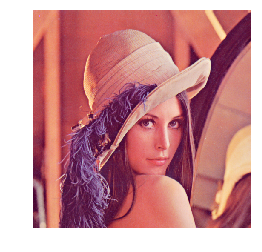

In [33]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.axis('off')

## グレースケール画像に変換
符号なし整数8ビット(uint8)型を最大値1にスケーリングして浮動小数点数型(float)に変更

In [34]:
from skimage.color import rgb2gray
#from skimage import img_as_float

gray_img = rgb2gray(img)
#gray_img_float = img_as_float(gray_img)
display(gray_img.dtype)
gray_img.max()

dtype('float64')

0.9654356862745097

## グレースケール画像の表示



(-0.5, 511.5, 511.5, -0.5)

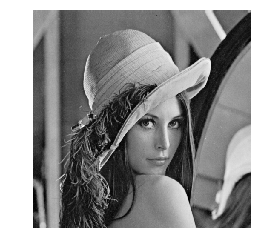

In [35]:
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

## フィルターカーネル（マスク係数）の準備

In [36]:
import numpy as np

filter_kernel = np.array([ [1,1,1],[1,1,1],[1,1,1] ])/9.0
display(filter_kernel)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

## フィルタ処理
Scipyライブラリの ndimage.correlate メソッドを利用（零値拡張処理）

In [0]:
from scipy.ndimage import correlate

res_img = correlate(gray_img, filter_kernel, mode='constant', cval=0.0)

## 処理結果の表示

(-0.5, 511.5, 511.5, -0.5)

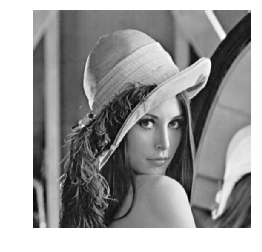

In [38]:
plt.imshow(res_img,cmap='gray')
plt.axis('off')